In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pysph.solver.utils import iter_output, load
from pprint import pprint

In [2]:
def get_pysph_ofiles(dir):
    ofiles = []
    for f in os.listdir(dir):
        if f.endswith('.hdf5'):
            ofiles.append(os.path.join(dir, f))
    return ofiles

def get_pysph_data(fname):
    data = load(fname)
    sd = data['solver_data']
    fluid = data['arrays']['fluid']
    return sd, fluid

In [3]:
dir = 'taylor_green_output'
re = 1000
U = 1

f_idx = -1
ofiles = get_pysph_ofiles(dir=dir)
fname = ofiles[f_idx]
fname = 'taylor_green_33614.hdf5'

sd, fluid = get_pysph_data(fname=fname)
_t = sd['t']
sd

{'count': 33614, 'dt': 4.251700681812132e-05, 't': 2.0}

In [4]:
x, y, p, rhoc, rho, gradv = fluid.get(
    'x', 'y', 'p', 'rhoc', 'rho', 'gradv'
)
u, v = fluid.get('u', 'v')
vmag = np.sqrt(u**2 + v**2)
omegax = gradv[5::9] - gradv[7::9]
omegay = gradv[6::9] - gradv[2::9]
omegaz = gradv[3::9] - gradv[1::9]
omega_mag = np.sqrt(omegax**2 + omegay**2 + omegaz**2)

In [11]:
np.random.seed(1)
_range = np.arange(10)
np.random.choice(_range, size=5, replace=False)

array([2, 9, 6, 4, 0])

In [12]:
def quiver_mask(x, y, u, v, visible_num=100, **kwargs):
    if visible_num > len(x):
        visible_num = len(x)
    np.random.seed(1)
    _range = np.arange(len(x))
    visible_idx = np.random.choice(_range, size=visible_num, replace=False)
    mask = np.zeros_like(x, dtype=bool)
    mask[visible_idx] = 1    
    return plt.quiver(x[mask], y[mask], u[mask], v[mask], **kwargs)

(-0.1, 1.1)

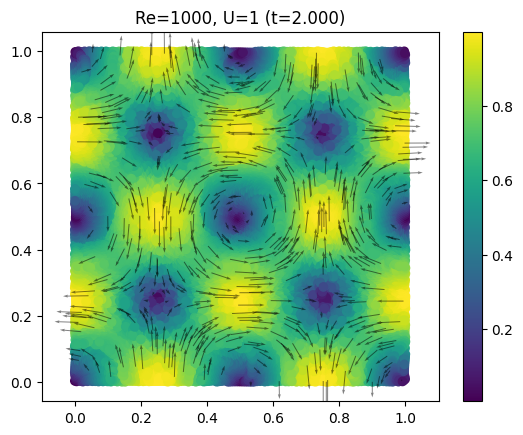

In [21]:
# plt.figure(figsize=(6, 6))
plt.scatter(x, y, c=vmag)
plt.colorbar()
plt.title(f'Re={re}, U={U} (t={_t:.3f})')
# quiver_mask_frac(x, y, u, v, frac=0.1, scale=20, color='k', alpha=0.4)
quiver_mask(x, y, u, v, visible_num=600, scale=15, color='k', alpha=0.5)
plt.axis('equal')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

(-0.1, 1.1)

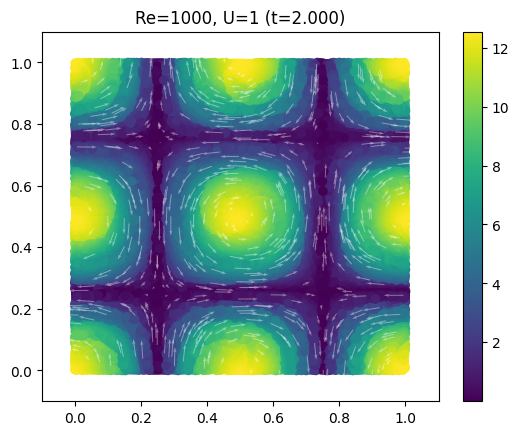

In [18]:
# plt.figure(figsize=(6, 6))
plt.scatter(x, y, c=omega_mag)
plt.colorbar()
plt.title(f'Re={re}, U={U} (t={_t:.3f})')
quiver_mask(x, y, u, v, visible_num=600, scale=20, color='w', alpha=0.4)
# plt.axis('equal')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

Text(0.5, 1.0, 'Re=1000, U=1 (t=0.048)')

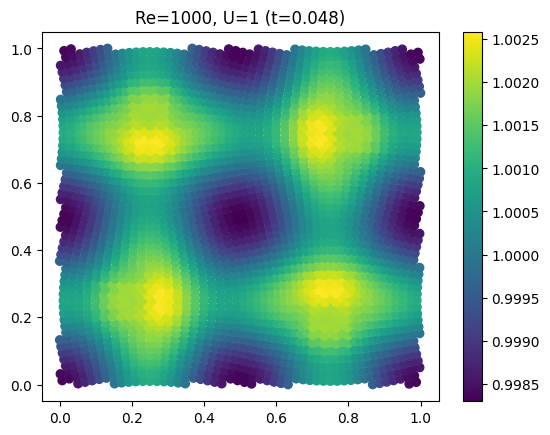

In [55]:
# plt.figure(figsize=(6, 6))
plt.scatter(x, y, c=rho)
plt.colorbar()
plt.title(f'Re={re}, U={U} (t={_t:.3f})')